In [1]:
from utils import *
import pandas as pd
import statsmodels.api as sm

/home/t/.virtualenvs/aigames2/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
mk1, mk2, mk3 = "Mk1", "Mk2", "Mk3"
new_xls = pd.ExcelFile("ols_data.xls")
old_xls = pd.ExcelFile("data14.xls")
old_sheetnames = [sheetname for sheetname in old_xls.sheet_names if "Follower" in sheetname and "Dummy" not in sheetname]
sorted(new_xls.sheet_names, reverse=True)

['DATA 04-05-2018 18.17.26 (Mk1)',
 'DATA 04-05-2018 17.24.17 (Mk3)',
 'DATA 04-05-2018 17.23.45 (Mk2)',
 'DATA 04-05-2018 17.09.46 (Mk1)']

In [3]:
historic_data = get_data_for(mk1, old_xls)
new_data = get_data_for(mk1, new_xls, sorted(new_xls.sheet_names))

## grab leader and follower prices
x, y = get_historic_prices_xy(historic_data)
xhat, yhat = get_prices_xy(new_data)

## add column of 1's to x values
x = sm.add_constant(x)

### Moore-Penrose Inverse

In [7]:
mpinv = np.linalg.pinv(x)
result = mpinv.dot(y)
b0 = result[1] ## slope
b1 = result[0] ## intercept

print('Linear regression using Moore-Penrose inverse')
print('parameters: a=%.2f b=%.2f'% (b0,b1))

Linear regression using Moore-Penrose inverse
parameters: a=0.40 b=1.10


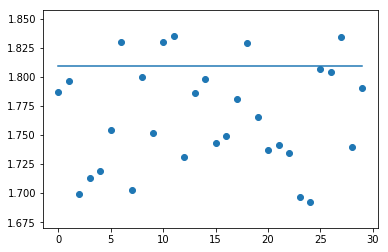

In [6]:
## plot new data with historic line of best fit. 
#plotscat(x, y, lambda x: x*b0 + b1)
plotscat(xhat, yhat, lambda x: x*b0 + b1)